In [13]:
# Importing the libraries
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [14]:
# Importing News Datasets
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [15]:
# Features and Target Extraction
sentences= twenty_train.data
y=twenty_train.target

In [16]:
# Tokenizing data
tokenizer = Tokenizer(num_words=2000)

In [17]:
# Preprocessing the data
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

In [18]:
# Model Implementation
from keras.layers import Embedding, Flatten
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len))
model.add(Flatten())
model.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
model.add(layers.Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [19]:
history = model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

# Model Evaluation
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 260s 31ms/step - loss: 7.8816 - acc: 0.0509 - val_loss: 2.9963 - val_acc: 0.0516
Epoch 2/5
8485/8485 [==============================] - 257s 30ms/step - loss: 3.0041 - acc: 0.0488 - val_loss: 2.9958 - val_acc: 0.0544
Epoch 3/5
8485/8485 [==============================] - 257s 30ms/step - loss: 2.9956 - acc: 0.0511 - val_loss: 2.9952 - val_acc: 0.0513
Epoch 4/5
8485/8485 [==============================] - 257s 30ms/step - loss: 2.9951 - acc: 0.0526 - val_loss: 2.9945 - val_acc: 0.0513
Epoch 5/5
2829/2829 [==============================] - 28s 10ms/step
Evaluation result on Test Data : Loss = 2.993852180657601, accuracy = 0.05125486105680466


In [20]:
# Predicting the Value for test sample
pred = model.predict_classes(X_test[[2],:])
print("Actual Prediction",y_test[1],"Predicted Prediction", pred)

Actual Prediction 6 Predicted Prediction [12]


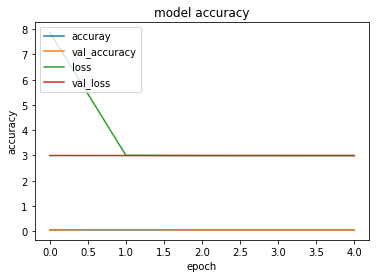

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()